<a href="https://colab.research.google.com/github/Adityasingh3008/CREDIT-CARD-DEFAULT-PREDICTION/blob/main/Group_Copy_Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Objective:

*  Objective of our project is to predict which customer might default in upcoming months. Before going any further let's have a quick look on definition of what actually meant by Credit Card Default.

* We are all aware what is credit card. It is type of payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.

* Credit card default happens when you have become severely delinquent(usually a young person who regularly performs illegal or immoral acts) on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

In [1]:
# Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Dataset
file_path = '/content/drive/MyDrive/default of credit card clients.xls'

In [4]:
# Upgrade python version to read excel file dataset
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 4.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [5]:
# Reading our Dataset
credit_data = pd.read_excel(file_path, header=1)

In [6]:
# head gives the top 5 rows of the given dataset
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# info() print the basic information of our DataFrame
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
# describe() gives the overall descriptive summary of the dataframe
credit_data.describe(include='all').T    # As there are 25 columns in dataset and all are numerical so we tranform it 


,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


* **The mean for our target variable is 0.221, which means that there are 22.1% of credit card that will default next month.**

* **The average value for the amount of credit card limit is 167,484.32 We have 
that the standard deviation is 129,747.6 (Is very Large).**

* **Regarding Education level we have that the mean is 1.85 with standard deviation 0.79, so almost all the clients have university or graduate school in their education.**

* **The average age is 35.5 years, with a standard deviation of 9.2.**

In [9]:
#  Shape give the total number of rows and columns
print('Rows {} , Columns {}'.format(credit_data.shape[0], credit_data.shape[1]))

Rows 30000 , Columns 25


In [10]:
# Print names of each column in a list
credit_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# Preprocessing the dataset

In real world the data has a lot of missing values and it is due to data corruption or fail to record the data. For that purpose it is very important to handle the missing values also many of machine learning algorithms does not support missing values, that's why we check missing values first.

In [11]:
# Checking the total null values in our dataset.
credit_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Figure size 1800x720 with 0 Axes>

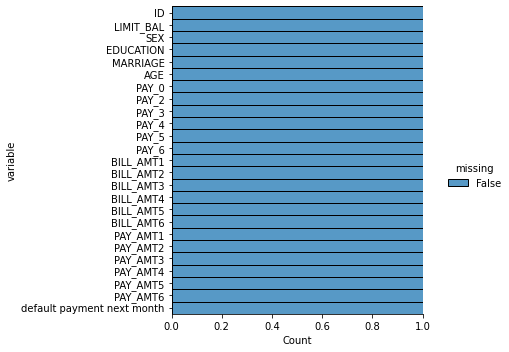

In [12]:
# Visualizing Missing value using Distplot
plt.figure(figsize=(25,10))
sns.displot(
    data=credit_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

plt.show()

In [13]:
# Checking the total number of duplicate values 
print('Duplicate values in our dataset is:',len(credit_data[credit_data.duplicated()]))

Duplicate values in our dataset is: 0


* We see there are neither null nor duplicate values in our given dataset.
* We are creating a copy of dataframe because whatever we applying a conditions on the given data so that it doesn't affect our original dataset.

In [14]:
# Creating a copy of dataframe
credit_defaulter_df = credit_data.copy()

In [15]:
# head gives the top 5 rows of the given dataset
credit_defaulter_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Rename the column for better convenience

In [16]:
# renaming the column feature for better understanding
credit_defaulter_df.rename(columns = {'default payment next month':'Defaulter_Payment','PAY_0':'PREV_PAY_DELAY_SEPT','PAY_2':'PREV_PAY_DELAY_AUG','PAY_3':'PREV_PAY_DELAY_JUL','PAY_4':'PREV_PAY_DELAY_JUN',
                     
                   'PAY_5':'PREV_PAY_DELAY_MAY','PAY_6':'PREV_PAY_DELAY_APR','BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL',

                   'BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR','PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG',
                   
                   'PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'} ,inplace=True )




In [17]:
# tail gives the last 5 rows of the given dataset
credit_defaulter_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PREV_PAY_DELAY_SEPT,PREV_PAY_DELAY_AUG,PREV_PAY_DELAY_JUL,PREV_PAY_DELAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter_Payment
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


# Exploratory Data Analysis (EDA)

# Find the number of Defaulters

In [18]:
# value_counts() method will count the different class values of 'Default_Payment'column of the given dataset 
credit_defaulter_df['Defaulter_Payment'].value_counts()


0    23364
1     6636
Name: Defaulter_Payment, dtype: int64

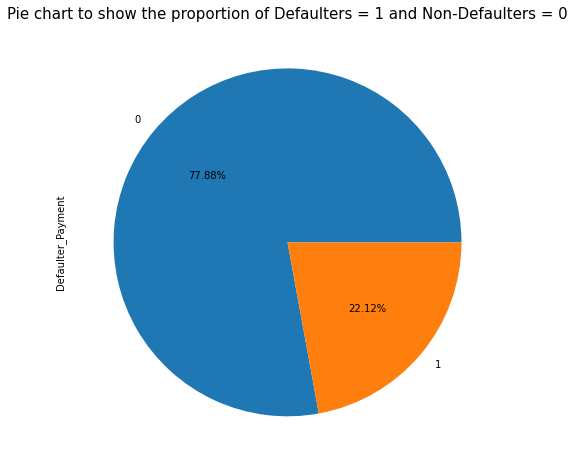

In [19]:
# plot pie chart to show the proportion of Defaulters and Non-Defaulters
# replace '0' with 'Non-Defaulter' and '1' with 'Defaulter' 
#  autopct parameter enables you to display the percent value using Python string formatting  

credit_defaulter_df['Defaulter'] = credit_defaulter_df.Defaulter_Payment.replace([1,0], ['Defaulter', 'Non-Defaulter'])
credit_defaulter_df['Defaulter_Payment'].value_counts().plot(kind="pie",autopct='%1.2f%%',figsize=(8,8))
plt.title("Pie chart to show the proportion of Defaulters = 1 and Non-Defaulters = 0" , Size = 15)
plt.show()

* The above Pie chart conclude that No. of defaulters are less
* Non-defaulters are around 77.88% and Defaulters are around 22.12%

# Plotting a continuous variable

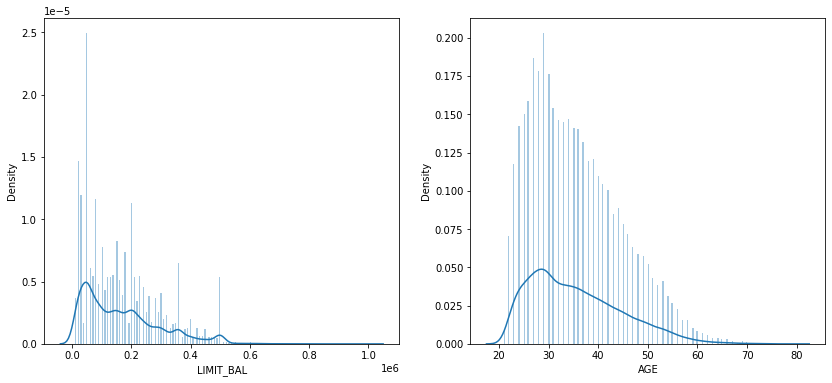

In [20]:
# Plotting a continuous variable
plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.distplot(credit_defaulter_df.LIMIT_BAL, kde=True, bins=220)

plt.subplot(122)
sns.distplot(credit_defaulter_df.AGE,kde=True,bins=220)

plt.show()

**Conclusion:-**
* **By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients.**
* **We have more number of clients having limiting balance between 0 to 200000 currency.**
* **We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups.**
* **We will observe the effect of variables on target variable below**

# Find the limit balance for each defaulters vs non-defaulters customers 

In [21]:
# Find number of Defaulters according to the 'LIMIT_BAL' 
credit_defaulter_df.groupby(['LIMIT_BAL', 'Defaulter']).size().unstack()

Defaulter,Defaulter,Non-Defaulter
LIMIT_BAL,,
10000,197.0,296.0
16000,NaN,2.0
20000,698.0,1278.0
30000,568.0,1042.0
40000,92.0,138.0
...,...,...
750000,NaN,4.0
760000,NaN,1.0
780000,NaN,2.0


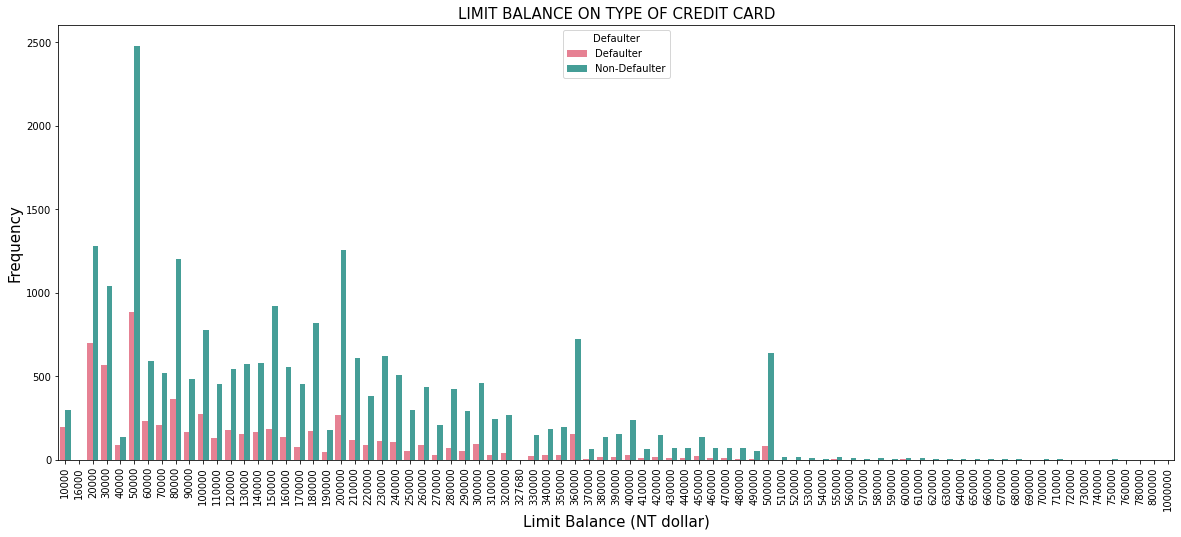

In [22]:
# plotting the count plot to vizualize the data distribution with respect to Limit Balance

plt.figure(figsize=[20, 8]) # figsize is used to set the size of graph
sns.countplot( x='LIMIT_BAL', hue = 'Defaulter',data =credit_defaulter_df, palette = 'husl')
plt.xticks(rotation = 90) # Rotate the value of x-axis to 45 degree angle
plt.xlabel('Limit Balance (NT dollar)', SIZE=15) # Set the x-axis label 
plt.ylabel('Frequency', SIZE=15)  # Set the x-axis label
plt.title('LIMIT BALANCE ON TYPE OF CREDIT CARD', SIZE=15) # Set the graph title
plt.show()



* From the above graph, We find out the number of Defaulters and Non-defaulters according to the LIMIT balance.
* Defaulters have limit balance within the range of **10k to 50k**


# Boxplot for Pay_Amt vs Limit_bal

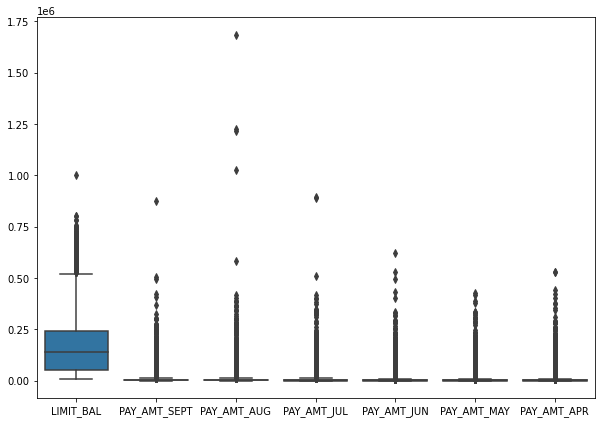

In [23]:
# Boxplot for Pay_Amt vs Limit_bal

plt.figure(figsize=(10,7))
sns.boxplot(data=credit_defaulter_df[['LIMIT_BAL','PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']])
plt.show()

# Find the total number of customers from different "SEX" categories  

In [24]:
# Counting the number of Males and Females 
print('SEX column distribution : 1=Male, 2=Female')
credit_defaulter_df['SEX'].value_counts()



SEX column distribution : 1=Male, 2=Female


2    18112
1    11888
Name: SEX, dtype: int64

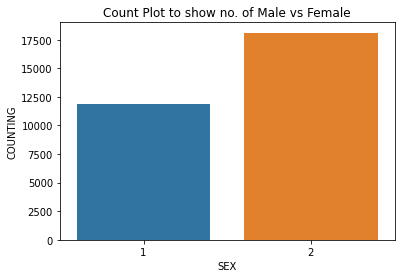

In [25]:
# Plot the count plot to show the number of Males and Females category

sns.countplot(credit_defaulter_df['SEX'])
plt.title("Count Plot to show no. of Male vs Female")
plt.ylabel("COUNTING")
plt.show()

* **1** represent Male and **2** represent Female
* Females customers are more than Male customers

# Find the total number of customers from different education category

In [26]:
# Plot the count plot to show the distribution of education category 

print('Education column distribution : 1=Graduate school, 2=University, 3=High school, 4=Others, 5=unknown, 6=unknown')
credit_defaulter_df['EDUCATION'].value_counts()

Education column distribution : 1=Graduate school, 2=University, 3=High school, 4=Others, 5=unknown, 6=unknown


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

* **1** represent Graduate
* **2** represent University
* **3** represent High School
* **4** represent Others
* **5** and **6** represent unknown .It's not a category

In [27]:
# As 5 and 6 are unknown category which represent nothing .So,we replace 4,5,6 with 0 as others   
credit_defaulter_df["EDUCATION"]=credit_defaulter_df["EDUCATION"].replace({4:0,5:0,6:0})

In [28]:
# Values are replaced and represented as 0
credit_defaulter_df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

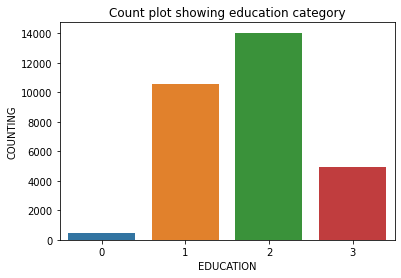

In [29]:
# Plot the count plot which showing the different education category 
sns.countplot(credit_defaulter_df['EDUCATION'])
plt.title("Count plot showing education category")
plt.ylabel("COUNTING")
plt.show()

* The above count plot conclude that there are more number of customers from **University**

# Find the total number of customers from different marital status categories

In [30]:
# Count the total number of different Marital status category
credit_defaulter_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

* **1** represent "Married"
* **2** represent "Single"
* **3** represent "Others"
* **0** represent "Unknown"



In [31]:
# As "0" represent unknown category .So we replace '0' with '3' to make it other category 
credit_defaulter_df['MARRIAGE']=credit_defaulter_df['MARRIAGE'].replace({0:3})

In [32]:
# Counting Martial Status category
credit_defaulter_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

* Now ,**Unknown** category is represented by **3** as **Others**

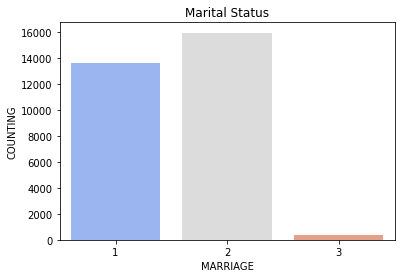

In [33]:
# Count plot to show status of marriage
sns.countplot(credit_defaulter_df['MARRIAGE'],palette = 'coolwarm')
plt.title("Marital Status")
plt.ylabel("COUNTING")
plt.show()

* There are more number of **Single** customers than **Married** customers

# Find the total number of Male and Female defaulters and non-defaulters

In [34]:
# groupby() function is used to split the data into groups based on some criteria.
# Here,We are grouping sex category and find the total number of defaulters and non-defaulters

credit_defaulter_df.groupby('SEX')['Defaulter'].value_counts()

SEX  Defaulter    
1    Non-Defaulter     9015
     Defaulter         2873
2    Non-Defaulter    14349
     Defaulter         3763
Name: Defaulter, dtype: int64

Text(0.5, 1.0, 'Distribution of Male vs Female Defaulters ')

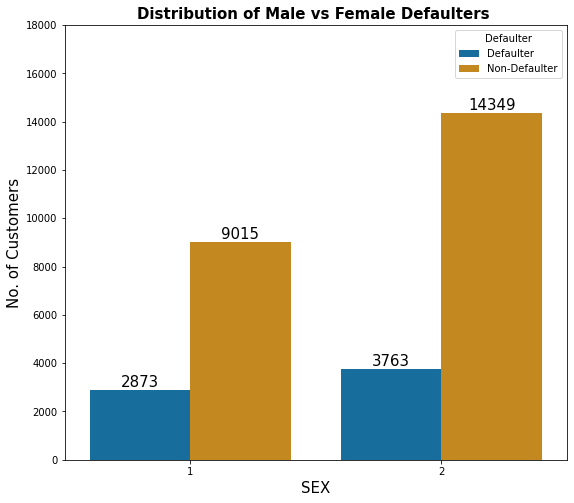

In [35]:
# Count plot to show the total number of Male vs Female defaulters

plt.figure(figsize=(9,8))
ax = sns.countplot(x="SEX", data=credit_defaulter_df,  palette = 'colorblind', hue="Defaulter")

#  Iterrating over the bars one-by-one
for bar in ax.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  #  x-coordinate: bar.get_x() + bar.get_width() / 2
  #  y-coordinate: bar.get_height()
  #  free space to be left to make graph pleasing: (0, 8)
  #  ha and va stand for the horizontal and vertical alignment
  
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
     
plt.xlabel("SEX", fontsize= 15)
plt.ylabel("No. of Customers", fontsize= 15)
plt.ylim(0,18000)
plt.title('Distribution of Male vs Female Defaulters ',weight ='bold', fontsize= 15)


#Conclusion:
* From the above graph,we conclude that there are more number of female defaulters and non-defaulters
* Number of Male defaulters are less

# Find the total number of Defaulters and Non-Defaulters on the basis of different education category

In [36]:
# groupby() function is used to split the data into groups based on some criteria.
# Here,We are grouping education category and find the total number of defaulters and non-defaulters
print(credit_defaulter_df.groupby(['EDUCATION', 'Defaulter']).size().unstack()) 

Defaulter  Defaulter  Non-Defaulter
EDUCATION                          
0                 33            435
1               2036           8549
2               3330          10700
3               1237           3680


Text(0.5, 1.0, 'Distribution of defaulters education-wise ')

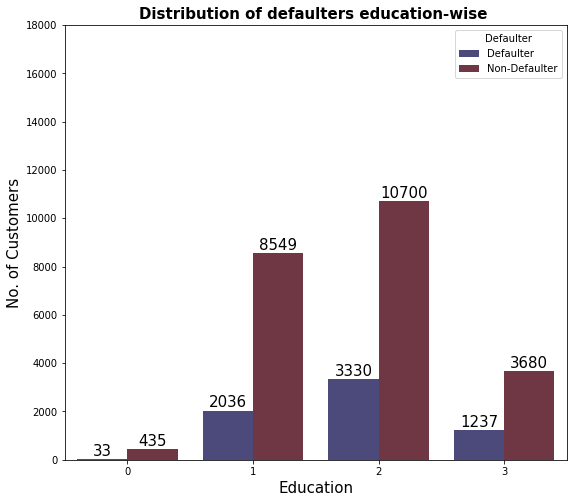

In [37]:
# Count plot to show the total number of defaulters and non-defaulters on the basis of different education category

plt.figure(figsize=(9,8))
ax = sns.countplot(x="EDUCATION", data=credit_defaulter_df,  palette = 'icefire', hue="Defaulter")

#  Iterrating over the bars one-by-one
for bar in ax.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  #  x-coordinate: bar.get_x() + bar.get_width() / 2
  #  y-coordinate: bar.get_height()
  #  free space to be left to make graph pleasing: (0, 8)
  #  ha and va stand for the horizontal and vertical alignment
  
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
     
plt.xlabel("Education", fontsize= 15)
plt.ylabel("No. of Customers", fontsize= 15)
plt.ylim(0,18000)
plt.title('Distribution of defaulters education-wise ',weight ='bold', fontsize= 15)


# Conclusion:
From the above graph we conclude that,
* Most of the defaulters and non-defaulters are from university
* No. of graduate defaulters are less than university defaulters
* Very few  defaulters and non-defaulters are from High school

# Find the total number of defaulters according to Marital status

In [38]:
# groupby() function is used to split the data into groups based on some criteria.
# Here,We are grouping Marriage category and find the total number of defaulters and non-defaulters
print(credit_defaulter_df.groupby(['MARRIAGE', 'Defaulter']).size().unstack()) 

Defaulter  Defaulter  Non-Defaulter
MARRIAGE                           
1               3206          10453
2               3341          12623
3                 89            288


Text(0.5, 1.0, 'Distribution of defaulters acc. to marital status')

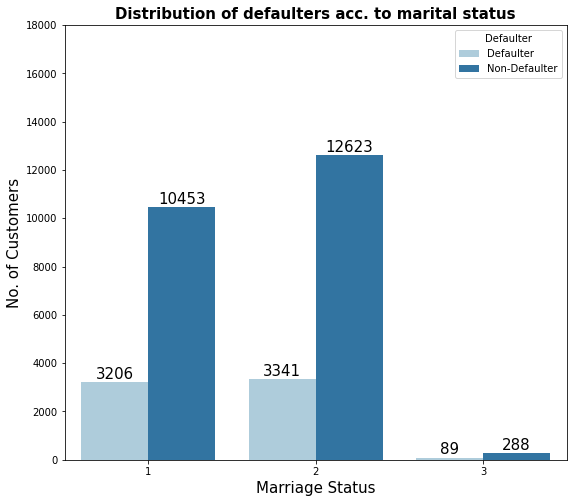

In [39]:
# Count plot to show the total number of defaulters and non-defaulters on the basis of different marriage category

plt.figure(figsize=(9,8))
ax = sns.countplot(x="MARRIAGE", data=credit_defaulter_df,  palette = 'Paired', hue="Defaulter")

#  Iterrating over the bars one-by-one
for bar in ax.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  #  x-coordinate: bar.get_x() + bar.get_width() / 2
  #  y-coordinate: bar.get_height()
  #  free space to be left to make graph pleasing: (0, 8)
  #  ha and va stand for the horizontal and vertical alignment
  
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
     
plt.xlabel("Marriage Status", fontsize= 15)
plt.ylabel("No. of Customers", fontsize= 15)
plt.ylim(0,18000)
plt.title('Distribution of defaulters acc. to marital status',weight ='bold', fontsize= 15)


# Conclusion:
From the above graph we conclude that,
* Most of the customers are Single
* No. of defaulters and non-defaulters are single.

# Categorize the no. of defaulters and non-defaulters age-wise 

In [40]:
# groupby() function is used to split the data into groups based on some criteria.
# Here we groupby Age and Defaulter column to get number of defaults and non defaults. 
df_age =  credit_defaulter_df.groupby(['AGE', 'Defaulter']).size().unstack()
df_age.head(10)

Defaulter,Defaulter,Non-Defaulter
AGE,,
21,14.0,53.0
22,169.0,391.0
23,247.0,684.0
24,300.0,827.0
25,302.0,884.0
26,253.0,1003.0
27,313.0,1164.0
28,286.0,1123.0
29,313.0,1292.0


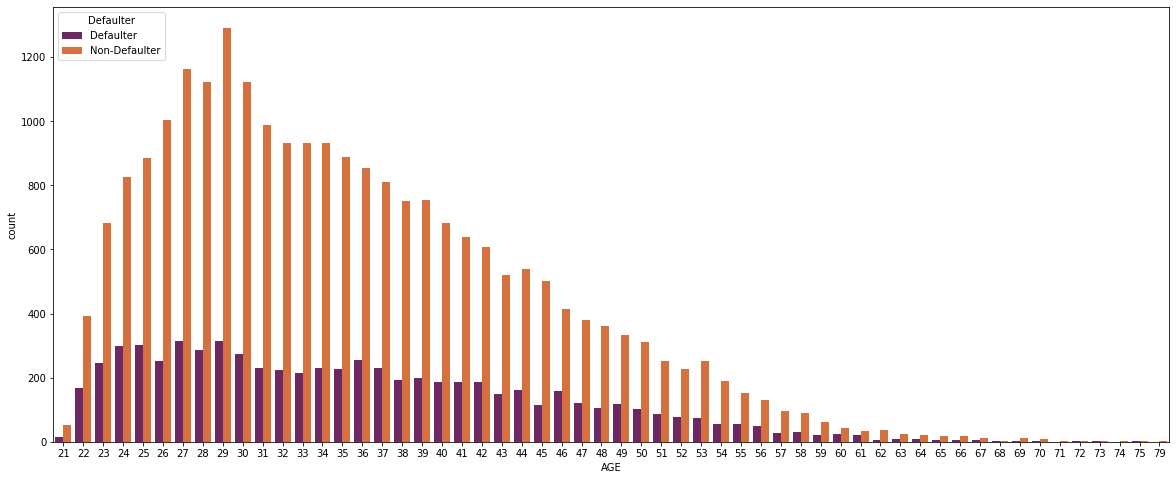

In [41]:
# plotting the count plot to vizualize the data distribution with respect to Age
plt.figure(figsize=[20, 8])
sns.countplot(x = 'AGE', hue = 'Defaulter',data =credit_defaulter_df, palette = 'inferno')

# Conclusion:

From the above graph we conclude that,
* More number of credit card holders age between 26-32 years
* 29 years age is the highest uses of credit card.
* Age above 60 years old rarely uses the credit card.
* Also, more number of Defaulters are between 27-29 years.



# How many months the defaulters have delayed their payment in previous months 

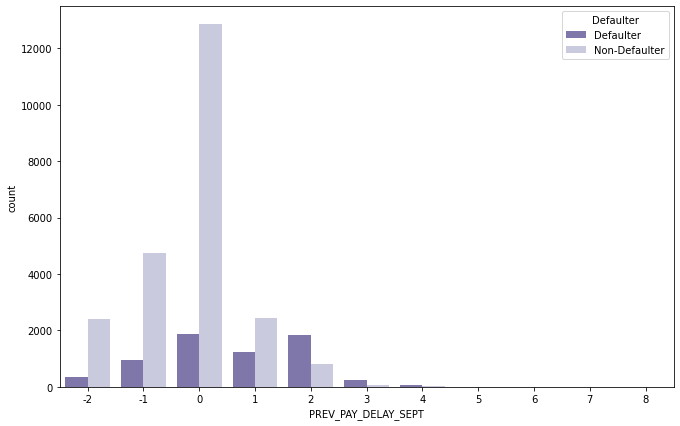

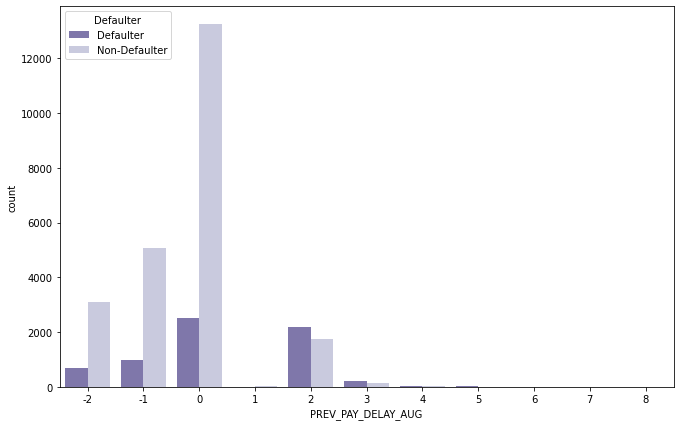

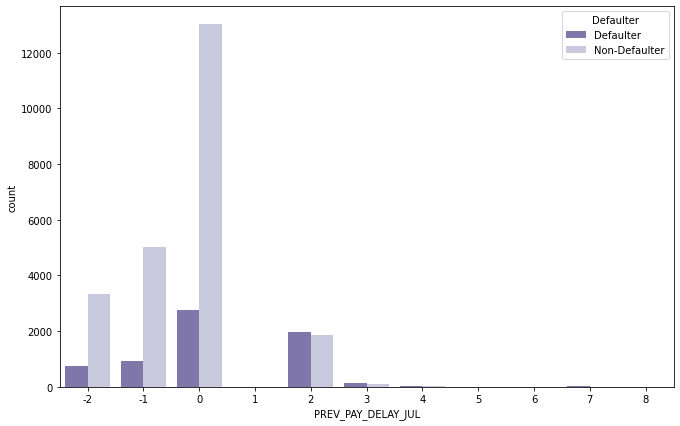

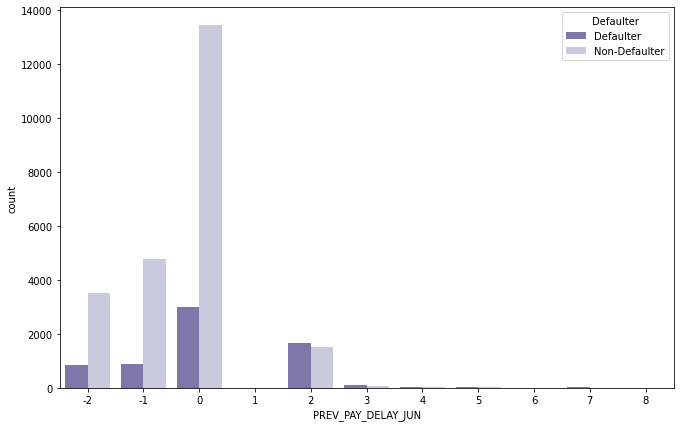

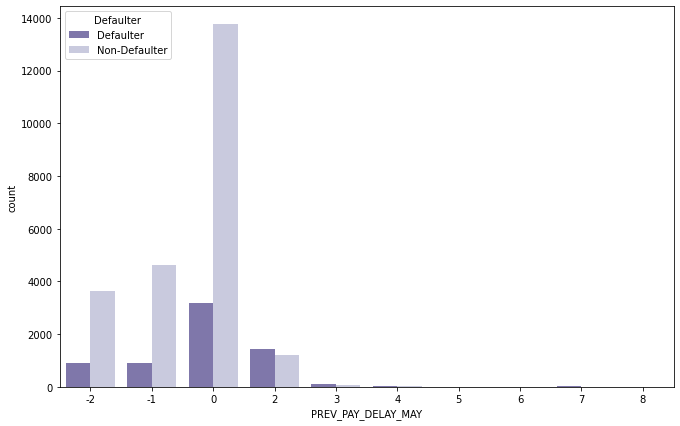

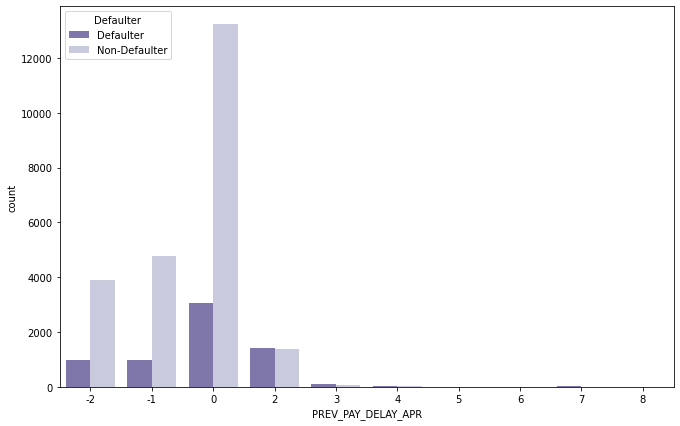

In [42]:
# Looking at the payment columns for each month.
payment_column_list = ['PREV_PAY_DELAY_SEPT',	'PREV_PAY_DELAY_AUG',	'PREV_PAY_DELAY_JUL',	'PREV_PAY_DELAY_JUN',	'PREV_PAY_DELAY_MAY',	'PREV_PAY_DELAY_APR']

# Plotting graph for each payment column
for pay_column in payment_column_list:
  plt.figure(figsize=(11,7))
  sns.countplot(x = pay_column, hue = 'Defaulter', data = credit_defaulter_df ,palette = 'Purples_r')

# Conclusion:
* After looking at the previous month status ,we conclude that maximum number of defaulters are delaying their payment for 2 months.


# Pair plot for monthly bill amount

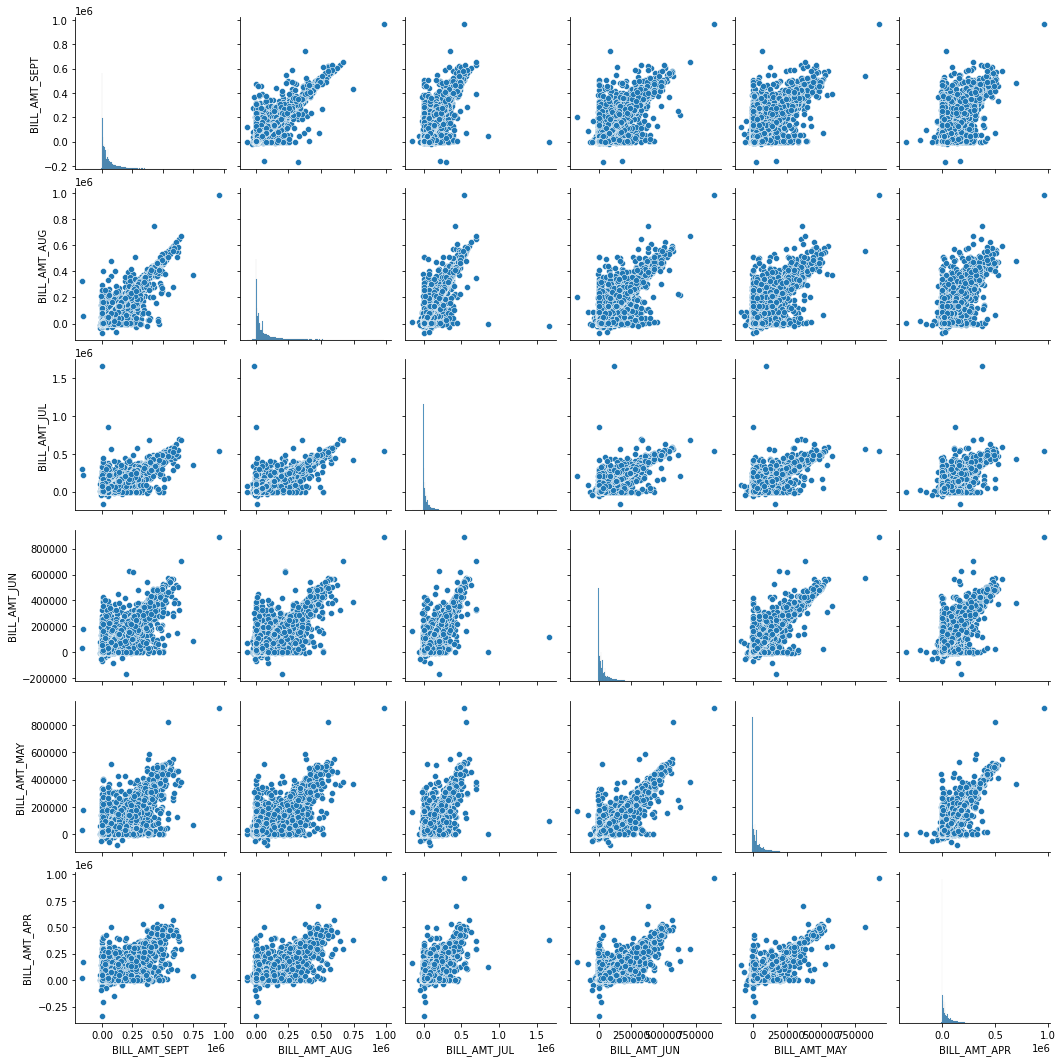

In [43]:
# Plot the pair plot for bill amount paid by each holder monthly
# Assign the bill amount features to a single variable 

df_bill_amount = credit_defaulter_df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]
sns.pairplot(data = df_bill_amount) # plotting the pair plot for bill amount

# Plot the heat map to see the correlation among variables in the dataframe

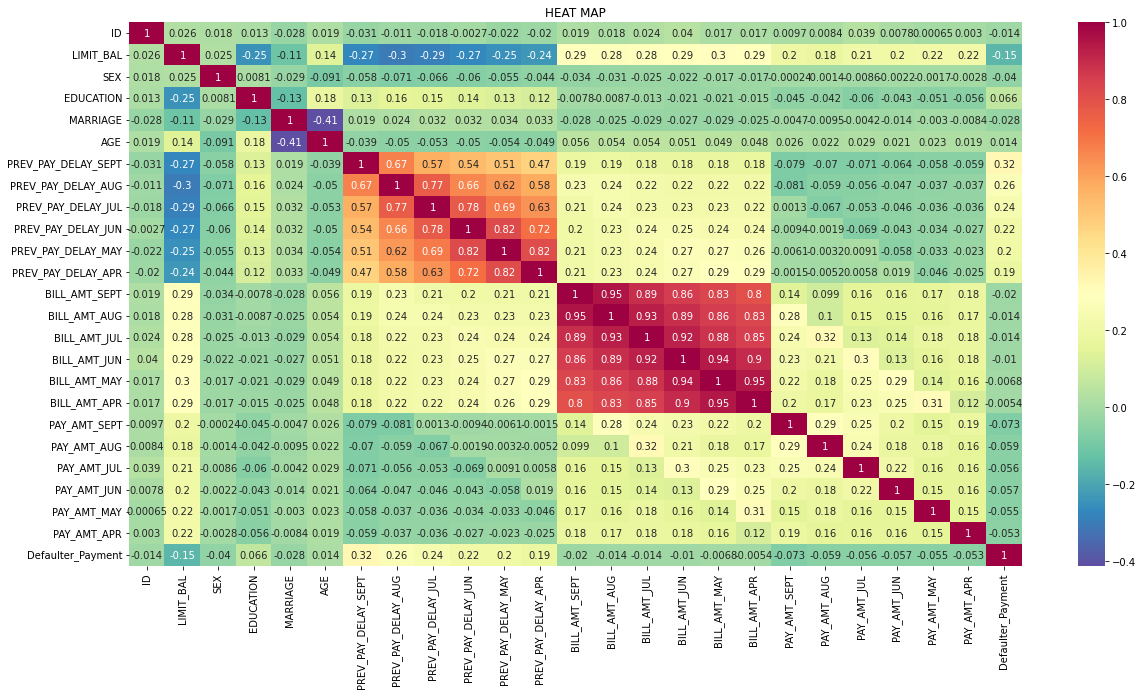

In [44]:
# correlation between variables
plt.figure (figsize= (20,10))
correlation= credit_defaulter_df.corr()
sns.heatmap(correlation, annot=True, cmap='Spectral_r')
plt.title("HEAT MAP")
plt.show()

# Data Cleaning

# Conclusion:
From the above heat map we conclude that,
* There is a negative correlation in age ,limit_bal and marriage
* There is high positive correlation in delay payment and bill column 

In [45]:
#  Checking Inter-Quartile range value for "LIMIT_BAL" column 

Q1 = credit_defaulter_df['LIMIT_BAL'].quantile(0.25)  #  lower range
Q3 = credit_defaulter_df['LIMIT_BAL'].quantile(0.75)  #  upper range

IQR = Q3 - Q1 # interquartile range
print(IQR)


190000.0


# Detecting outliers

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 25 Text major ticklabel objects>)

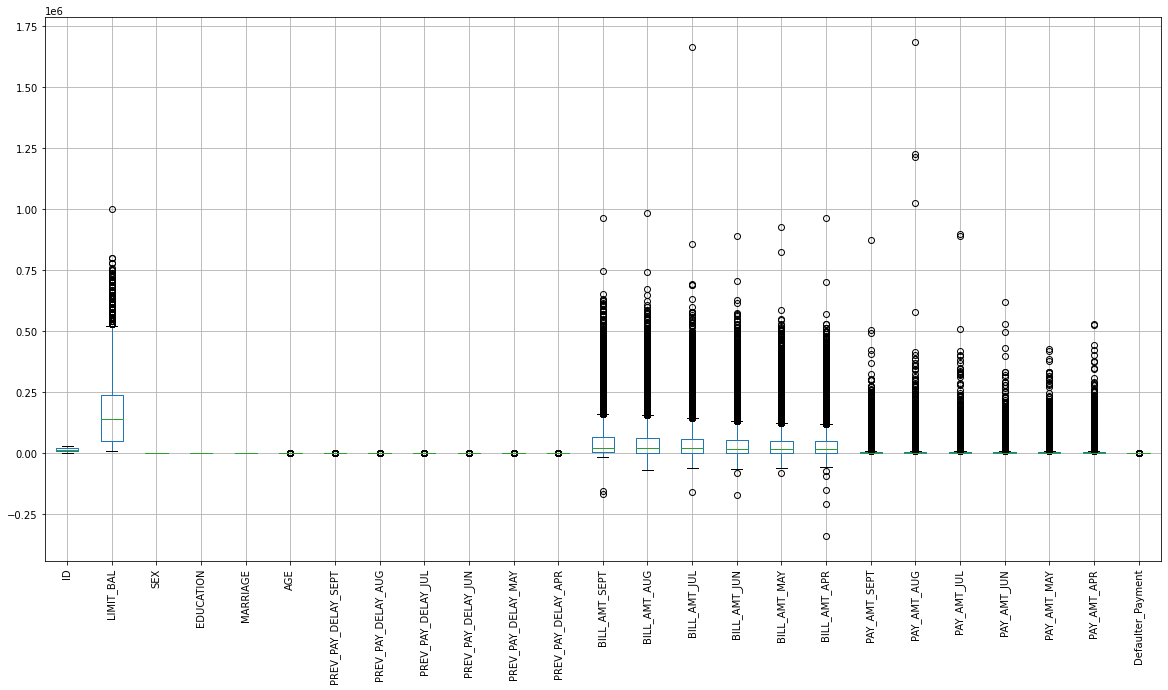

In [46]:
# Draw box plot to see if there is any outliers in our dataset
plt.figure (figsize= (20,10))
credit_defaulter_df.boxplot()
plt.xticks(rotation=90) #  rotate each value at x-axis to 90 degree angle

# Conclusion:
From the above heat map we conclude that,
* There are lots of outliers present in multiple columns.
* Most of the outliers data are present in payment and bill columns

In [47]:
# See the list of columns
credit_defaulter_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PREV_PAY_DELAY_SEPT', 'PREV_PAY_DELAY_AUG', 'PREV_PAY_DELAY_JUL',
       'PREV_PAY_DELAY_JUN', 'PREV_PAY_DELAY_MAY', 'PREV_PAY_DELAY_APR',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'Defaulter_Payment', 'Defaulter'],
      dtype='object')

# Removing outliers

In [48]:
# creating list for columns having outliers
cols = ['LIMIT_BAL', 'BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
                 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY',
                 'PAY_AMT_APR']
# dropping outliers for columns which have outliers in our dataframe
Q1 = credit_defaulter_df[cols].quantile(0.25)  #  lower range
Q3 = credit_defaulter_df[cols].quantile(0.75)  #  upper range

IQR = Q3 - Q1 # interquartile range

# using interquartile range to find outliers in the data and remove them
credit_defaulter_df = credit_defaulter_df[~((credit_defaulter_df[cols] < (Q1 - 1.5 * IQR)) |(credit_defaulter_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
 

In [49]:
# dropping outliers for "LIMIT_BAL" which have outliers in our dataframe
Q1 = credit_defaulter_df['LIMIT_BAL'].quantile(0.25)  #  lower range
Q3 = credit_defaulter_df['LIMIT_BAL'].quantile(0.75)  #  upper range

IQR = Q3 - Q1 # interquartile range
print(IQR)


150000.0


In [50]:
# Now you can see that after removing the outliers the shape of the dataframe is changed
credit_defaulter_df.shape

(19731, 26)

# Conclusion after removing outliers:
* Shape of dataframe is changed now
* Inter-Quartile range for LIMIT_VAL is decreased after removing outliers


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 25 Text major ticklabel objects>)

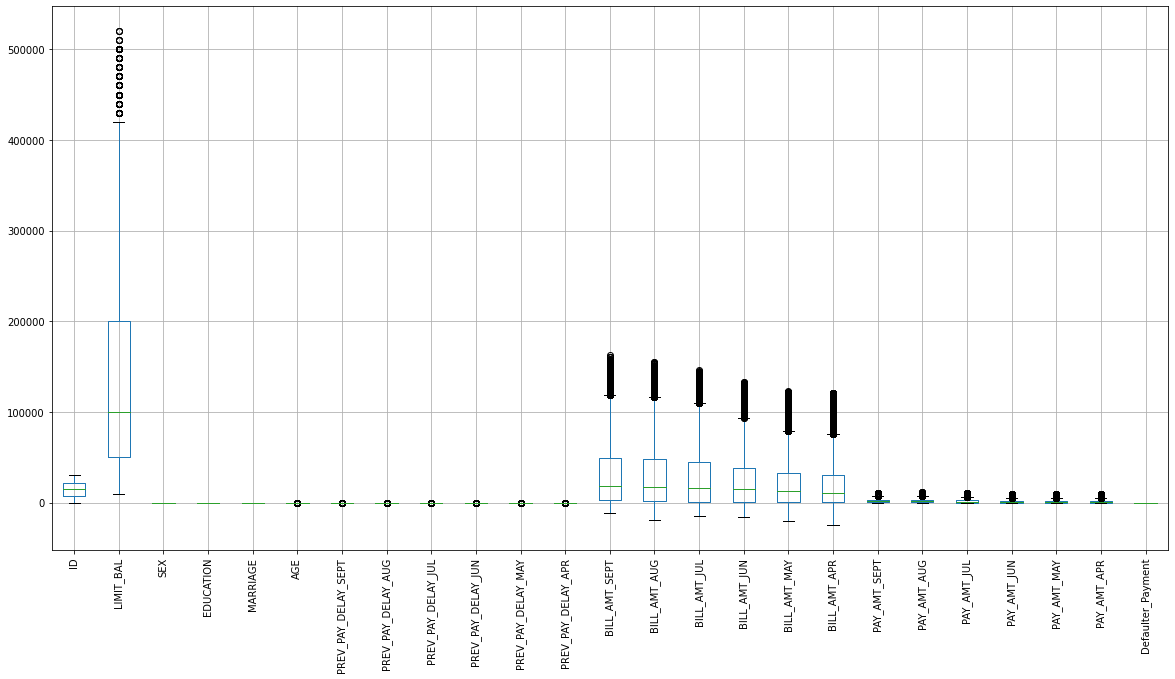

In [51]:
#  Draw box plot to see if there is any outliers left in our dataset
plt.figure (figsize= (20,10))
credit_defaulter_df.boxplot()
plt.xticks(rotation=90) #  rotate each value at x-axis to 90 degree angle

* From above box plot,we have seen that some outliers are remaining in the dataframe.

In [52]:
# Removing some columns that are unimportant.
credit_defaulter_df.drop(['ID','Defaulter','AGE'], axis=1,inplace =True)

In [53]:
credit_defaulter_df.shape # shape is changed after dropping columns

(19731, 23)

# Reducing Multicollinearity

* The **variance inflation factor (VIF)** identifies correlation between independent variables and the strength of that correlation. * Using Variance Inflation Factor- VIF- we can determine if two independent variables are collinear with each other.

* A **variance inflation factor**(VIF) detects multicollinearity and it affects the performance of regression and classification models analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your results. 


In [54]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [55]:
# Call user-defined calc_vif() function for independent variables 
calc_vif(credit_defaulter_df[[i for i in credit_defaulter_df.describe().columns if i not in ['Defaulter_Payment']]])

,variables,VIF
0,LIMIT_BAL,2.898259
1,SEX,8.433152
2,EDUCATION,5.599418
3,MARRIAGE,6.313003
4,PREV_PAY_DELAY_SEPT,1.858743
5,PREV_PAY_DELAY_AUG,3.509619
6,PREV_PAY_DELAY_JUL,4.636735
7,PREV_PAY_DELAY_JUN,5.607335
8,PREV_PAY_DELAY_MAY,6.361494
9,PREV_PAY_DELAY_APR,4.300316


In [56]:
# Bill amount columns have high VIF factor 
# Add one variable "TOTAL_BILL_PAY" which store bill amount for all months
credit_defaulter_df['TOTAL_BILL_PAY'] = credit_defaulter_df['BILL_AMT_SEPT'] + credit_defaulter_df['BILL_AMT_AUG'] + credit_defaulter_df['BILL_AMT_JUL'] + credit_defaulter_df['BILL_AMT_JUN'] +  credit_defaulter_df['BILL_AMT_MAY'] + credit_defaulter_df['BILL_AMT_APR'] 

In [57]:
# Now,find the VIF factor again to find 
calc_vif(credit_defaulter_df[[i for i in credit_defaulter_df.describe().columns if i not in ['Defaulter_Payment','BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']]])

,variables,VIF
0,LIMIT_BAL,2.882937
1,SEX,8.424020
2,EDUCATION,5.587310
3,MARRIAGE,6.304269
4,PREV_PAY_DELAY_SEPT,1.857488
5,PREV_PAY_DELAY_AUG,3.435968
6,PREV_PAY_DELAY_JUL,4.589257
7,PREV_PAY_DELAY_JUN,5.588403
8,PREV_PAY_DELAY_MAY,6.322405
9,PREV_PAY_DELAY_APR,4.217279


# Feature Engineering 
   # One Hot Encoding
   * One hot encoding is a process by which categorical variables are converted into a numerical variables that could be provided to ML algorithms to do a better job in prediction.
   * Here we perform one hot encoding on 'EDUCATION', 'MARRIAGE', and 'SEX'.
   * **get_dummies**:- It converts categorical data into dummy or indicator variables.

In [58]:
# Get dummies variable
credit_defaulter_df = pd.get_dummies(credit_defaulter_df,columns=['EDUCATION','SEX','MARRIAGE'])

In [59]:
credit_defaulter_df 

,LIMIT_BAL,PREV_PAY_DELAY_SEPT,PREV_PAY_DELAY_AUG,PREV_PAY_DELAY_JUL,PREV_PAY_DELAY_JUN,PREV_PAY_DELAY_MAY,PREV_PAY_DELAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,TOTAL_BILL_PAY,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,7704,0,0,1,0,0,1,1,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,...,17077,0,0,1,0,0,1,0,1,0
2,90000,0,0,0,0,0,0,29239,14027,13559,...,101653,0,0,1,0,0,1,0,1,0
3,50000,0,0,0,0,0,0,46990,48233,49291,...,231334,0,0,1,0,0,1,1,0,0
5,50000,0,0,0,0,0,0,64400,57069,57608,...,238114,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,210000,3,2,2,2,2,2,2500,2500,2500,...,15000,0,0,1,0,1,0,1,0,0
29992,10000,0,0,0,-2,-2,-2,8802,10400,0,...,19202,0,0,0,1,1,0,1,0,0
29994,80000,2,2,2,2,2,2,72557,77708,79384,...,470933,0,0,1,0,1,0,0,1,0
29996,150000,-1,-1,-1,-1,0,0,1683,1828,3502,...,21182,0,0,0,1,1,0,0,1,0


In [60]:
# Count the number of defaulters
credit_defaulter_df['Defaulter_Payment'].value_counts()

0    14626
1     5105
Name: Defaulter_Payment, dtype: int64

In [61]:
# Creating dependent variable and independent variable
independent_variables = credit_defaulter_df.drop(['Defaulter_Payment'],axis=1)
dependent_variable = credit_defaulter_df['Defaulter_Payment']

In [62]:
# Print the dependent variable
dependent_variable

0        1
1        1
2        0
3        0
5        0
        ..
29991    1
29992    0
29994    1
29996    0
29999    1
Name: Defaulter_Payment, Length: 19731, dtype: int64

In [63]:
# Applying zscore to each values of independent variable 
# zcore is used for scaling the data
from scipy.stats import zscore  
X = round(independent_variables.apply(zscore),3)

In [64]:
# Assign dependent variable to 'Y' value 
Y = dependent_variable

# Train Test Split
* We need to divide the dataset into two subsets.
* The first subset is used to fit the model and is referred to as the **training** dataset. 
* The second subset is not used to train the model.Instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the **test** dataset.
* **Train Dataset** : Used to fit the machine learning model.
* **Test Dataset** : Used to evaluate the fit machine learning model.

In [65]:
# This method is used to split the dataset into training and test set while buliding the model

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)

X_train:  (15784, 29)
X_test:  (3947, 29)


# APPLYING SMOTE(Synthetic Minority Oversampling Technique)

* This technique is used to modify the unequal data classes to create balanced datasets. When the quantity of data is insufficient, the oversampling method tries to balance by incrementing the size of rare samples.

In [66]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_train_sm,Y_train_sm = smote.fit_resample(X,Y)

from collections import Counter
print('Original dataset shape', Counter(Y_train))
print('Resample dataset shape', Counter(Y_train_sm))
Counter(Y_train_sm)

Original dataset shape Counter({0: 11750, 1: 4034})
Resample dataset shape Counter({1: 14626, 0: 14626})


Counter({0: 14626, 1: 14626})

In [67]:
# Importing packages
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc , classification_report

# Create an empty dataframe for storing an evaluation metrics for each classification model to compare the values which model will give best result

In [68]:
# Creating empty data frame for each regression model 
i=0
evaluation_metrices_df = pd.DataFrame()

In [69]:
# User-defined funcion to find the evaluation metrics 

def print_metrics(actual, predicted):

  """ This function is used to find the accuracy score , precision score , recall score , f1 score , ROC_AUC Score , 
      Confusion Matrix , Classification  report """

  print('accuracy_score is {}'.format(accuracy_score(actual, predicted)))
  print('precision_score is {}'.format( precision_score(actual, predicted)))
  print('recall_score is {}'.format(recall_score(actual, predicted)))
  print('f1_score is {}'.format(f1_score(actual, predicted)))
  print('roc_auc_score is {}'.format( roc_auc_score(actual , predicted)))
  print('confusion_matrix is {}'.format(confusion_matrix(actual , predicted)))
  print('classification_report is {}'.format(classification_report(actual , predicted)))

  # evaluation matrix 

  """  This function is also inserting evaluation metrices of each applied model in 
       empty dataframe create above named as "evaluation_metrices_df"  
  """

  evaluation_metrices_df.loc[i,"Accuracy_Score"] = format(accuracy_score(actual, predicted))
  evaluation_metrices_df.loc[i,"Precision_Score"] = format( precision_score(actual, predicted))
  evaluation_metrices_df.loc[i,"Recall_Score"] = format(recall_score(actual, predicted))
  evaluation_metrices_df.loc[i,"F1_Score"] = format(f1_score(actual, predicted))
  evaluation_metrices_df.loc[i,"RUC_AUC_Score"] = format( roc_auc_score(actual , predicted))
  
  return


# We have build 6 Models:
* **Logistic Regression**
* **Random Forest Classifier**
* **K-Neighbor Classifier**
* **Support Vector Classifier**
* **Decision Tree Classifier**
* **XG Boosting**

# Performance Metrices:

* **Precision** is a good metric to use when the costs of false positive(FP) is high.

   **Precision = TP / (TP + FP)**

* **Recall** is a good metric to use when the cost associated with false negative(FN) is high.

   **Recall = TP / (TP + FN)**

* **F1-score** is a weighted average of precision and recall. Thus, it considers FP and FN. This metric is very useful when we have uneven class distribution, as it seeks a balance between precision and recall.

    **F1-score = 2 (precision*recall) / (precision + recall)**

* **ROC AUC Curve**
   * **ROC curve (receiver operating characteristic curve)** is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

    * **True Positive Rate**
    * **False Positive Rate** 

  * **AUC stands for "Area under the ROC Curve."** That is, AUC measures the entire two-dimensional area underneath the entire ROC curve


# Cross Validation:
* **Cross Validation :** In cross validation ,We divide our dataset into 3 parts training, validation and testing. The testing data is only for the final check, train and validation is used for the hyper parameter tuning in order to avoid the data leakage.

* **Hyperparameters :** are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. For eg, alpha, cv 


# Logistic Regression

* **Logistic regression** is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no.

In [70]:
from sklearn.linear_model import LogisticRegression
# Make Instance(Object)
# Predict values by using actual values in our dataset
log_model= LogisticRegression()
log_model.fit(X_train_sm,Y_train_sm)


LogisticRegression()

In [71]:
# Model score on testing data
print(f"testing_model_score:  {log_model.score(X_test,Y_test)}")

testing_model_score:  0.6850772738788954


In [72]:
# Get the y- train & test predicted values
Y_train_class_preds = log_model.predict(X_train_sm)
Y_test_class_preds = log_model.predict(X_test)

In [73]:
# Predict class from training data
Y_train_class_preds

array([1, 0, 0, ..., 1, 1, 1])

In [74]:
# Predict class from test data
Y_test_class_preds 

array([1, 1, 0, ..., 0, 0, 0])

In [75]:
# Accuracy score of train set and test set
logistic_train_accuracy= accuracy_score(Y_train_sm, Y_train_class_preds)
logistic_test_accuracy= accuracy_score(Y_test, Y_test_class_preds)

print("The accuracy on train data is ", logistic_train_accuracy)
print("The accuracy on test data is ", logistic_test_accuracy)

The accuracy on train data is  0.6803637358129359
The accuracy on test data is  0.6850772738788954


In [76]:
# Print metrics for training data
print_metrics(Y_train_sm,Y_train_class_preds)

accuracy_score is 0.6803637358129359
precision_score is 0.686986107173235
recall_score is 0.6626555449200054
f1_score is 0.6746015173661865
roc_auc_score is 0.680363735812936
confusion_matrix is [[10210  4416]
 [ 4934  9692]]
classification_report is               precision    recall  f1-score   support

           0       0.67      0.70      0.69     14626
           1       0.69      0.66      0.67     14626

    accuracy                           0.68     29252
   macro avg       0.68      0.68      0.68     29252
weighted avg       0.68      0.68      0.68     29252



[Text(0, 0.5, 'Non Defaulter'), Text(0, 1.5, 'IsDefaulter')]

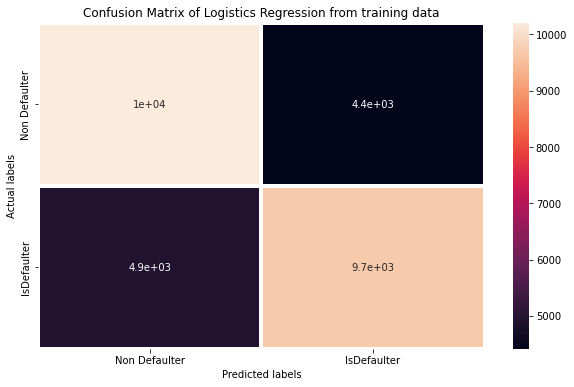

In [77]:
# Get the confusion matrix from training data

labels = ['Non Defaulter', 'IsDefaulter']
cm = confusion_matrix(Y_train_sm,Y_train_class_preds)
plt.figure (figsize= (10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, lw = 3) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix of Logistics Regression from training data' )
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

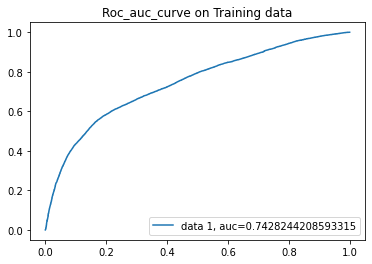

In [78]:
# Plot Roc_auc_curve for training data

Y_train_preds_logistic = log_model.predict_proba(X_train_sm)[:,1]
fpr, tpr, _ = roc_curve(Y_train_sm,  Y_train_preds_logistic )
auc = roc_auc_score(Y_train_sm,  Y_train_preds_logistic  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [79]:
# Print metrics for testing data
print_metrics(Y_test,Y_test_class_preds)
# Inserting metrices for Logistics Regression in the dataframe 
evaluation_metrices_df.loc[i,"Model_Name"]='Logistics regression'
i+=1  # i is a incremented variable

accuracy_score is 0.6850772738788954
precision_score is 0.4464508094645081
recall_score is 0.6694677871148459
f1_score is 0.5356742622338438
roc_auc_score is 0.6801789561443493
confusion_matrix is [[1987  889]
 [ 354  717]]
classification_report is               precision    recall  f1-score   support

           0       0.85      0.69      0.76      2876
           1       0.45      0.67      0.54      1071

    accuracy                           0.69      3947
   macro avg       0.65      0.68      0.65      3947
weighted avg       0.74      0.69      0.70      3947



[Text(0, 0.5, 'Non Defaulter'), Text(0, 1.5, 'IsDefaulter')]

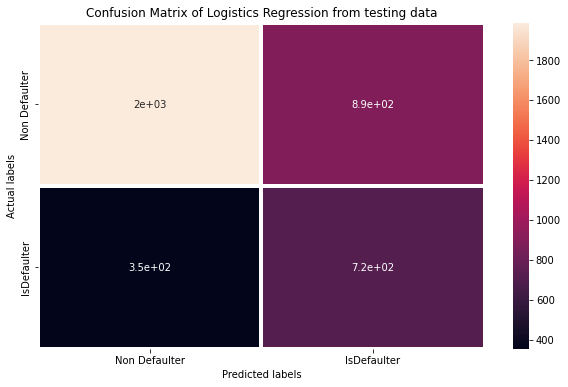

In [80]:
# Get the confusion matrix from test data

labels = ['Non Defaulter', 'IsDefaulter']
cm = confusion_matrix(Y_test,Y_test_class_preds)
plt.figure (figsize= (10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, lw = 3) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix of Logistics Regression from testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

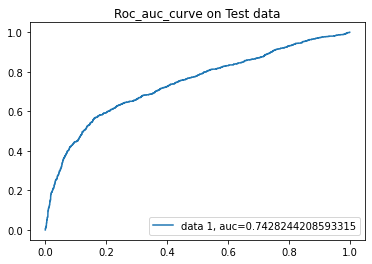

In [81]:
# Plot Roc_auc_curve for test data
y_test_pred_logistics = log_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test,y_test_pred_logistics)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Test data")
plt.legend(loc=4)
plt.show()

# Conclusion:
 * We have implemented logistic regression and we are getting accuracy_score is approx 69%.
 * Precision score approx is 45% and f1_score is 54%
 * roc_auc approx is 68% and recall_score is approx 67% . 

* Let's go ahead with other models and see if they can give better result.

# Random Forest Classifier with CV

* **Random forest** is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

* One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification. It performs better results for classification problems.

In [82]:
# Import Random forest 
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf= RandomForestClassifier() # Creating object
grid_values = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
grid_rf = GridSearchCV(rf, param_grid = grid_values, scoring = 'accuracy', cv=5)

# Fit the object to train dataset
grid_rf.fit(X_train_sm, Y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 14],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [84]:
grid_rf.best_params_  # best parameter

{'max_depth': 14, 'n_estimators': 100}

In [85]:
optimized_rf=grid_rf.best_estimator_
optimized_rf

RandomForestClassifier(max_depth=14)

In [86]:
grid_rf.best_score_

0.7899671821750098

In [87]:
# Model score  on training data
print(f"training_model_score:  {grid_rf.score(X_train_sm,Y_train_sm )}")

# Model score on testing data
print(f"testing_model_score:  {grid_rf.score(X_test,Y_test)}")

training_model_score:  0.8923834267742377
testing_model_score:  0.8821890043070687


In [88]:
# To predict the classes either 1 or 0
# Get the predicted classes
Y_train_class_preds_rf = grid_rf.predict(X_train_sm)
Y_test_class_preds_rf = grid_rf.predict(X_test)

In [89]:
# Print classes that are predicted by test data
Y_test_class_preds_rf

array([1, 0, 0, ..., 0, 1, 0])

In [90]:
Y_test

6281     1
10210    0
26384    0
14927    1
7705     0
        ..
14940    0
13816    0
17573    0
12637    1
19502    0
Name: Defaulter_Payment, Length: 3947, dtype: int64

In [91]:
# Evaluation of training model
print_metrics(Y_train_sm,Y_train_class_preds_rf)

accuracy_score is 0.8923834267742377
precision_score is 0.9135322092520536
recall_score is 0.8668125256392726
f1_score is 0.8895593600898121
roc_auc_score is 0.8923834267742377
confusion_matrix is [[13426  1200]
 [ 1948 12678]]
classification_report is               precision    recall  f1-score   support

           0       0.87      0.92      0.90     14626
           1       0.91      0.87      0.89     14626

    accuracy                           0.89     29252
   macro avg       0.89      0.89      0.89     29252
weighted avg       0.89      0.89      0.89     29252



[[13426  1200]
 [ 1948 12678]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

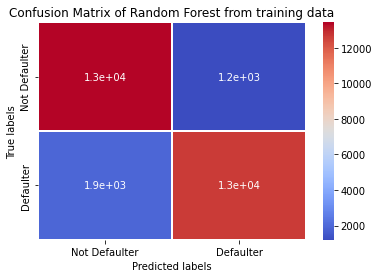

In [92]:
# Get the confusion matrix for training data 

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_train_sm,Y_train_class_preds_rf)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Random Forest from training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

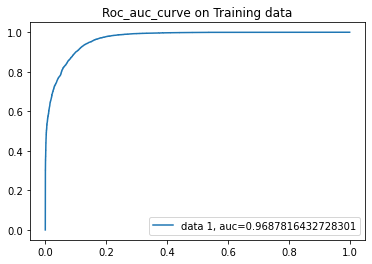

In [93]:
# Roc_auc_curve from training data

y_train_preds_proba_rf = grid_rf.predict_proba(X_train_sm)[::,1]
fpr, tpr, _ = roc_curve(Y_train_sm,  y_train_preds_proba_rf )
auc = roc_auc_score(Y_train_sm,  y_train_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [94]:
# Inserting metrices for Random Forest in the dataframe 
evaluation_metrices_df.loc[i,"Model_Name"]='Random Forest'

# Evaluation of testing model
print_metrics(Y_test,Y_test_class_preds_rf)
i+=1  # i is a incremented variable

accuracy_score is 0.8821890043070687
precision_score is 0.772972972972973
recall_score is 0.8011204481792717
f1_score is 0.7867950481430538
roc_auc_score is 0.8567493756890795
confusion_matrix is [[2624  252]
 [ 213  858]]
classification_report is               precision    recall  f1-score   support

           0       0.92      0.91      0.92      2876
           1       0.77      0.80      0.79      1071

    accuracy                           0.88      3947
   macro avg       0.85      0.86      0.85      3947
weighted avg       0.88      0.88      0.88      3947



[[2624  252]
 [ 213  858]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

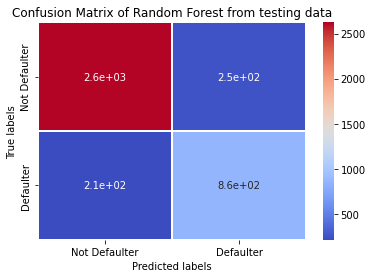

In [95]:
# Get the confusion matrix for testing  data 

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_test,Y_test_class_preds_rf)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Random Forest from testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

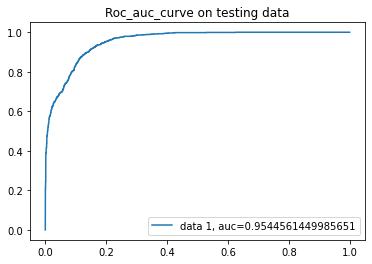

In [96]:
# Roc_auc_curve from testing data

y_test_preds_proba_rf = grid_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  y_test_preds_proba_rf)
auc = roc_auc_score(Y_test,  y_test_preds_proba_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on testing data")
plt.legend(loc=4)
plt.show()

# Finding the important features which are best for predicting the models

In [97]:
features = X_train_sm.columns  # independent columns from training data
importances = grid_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)

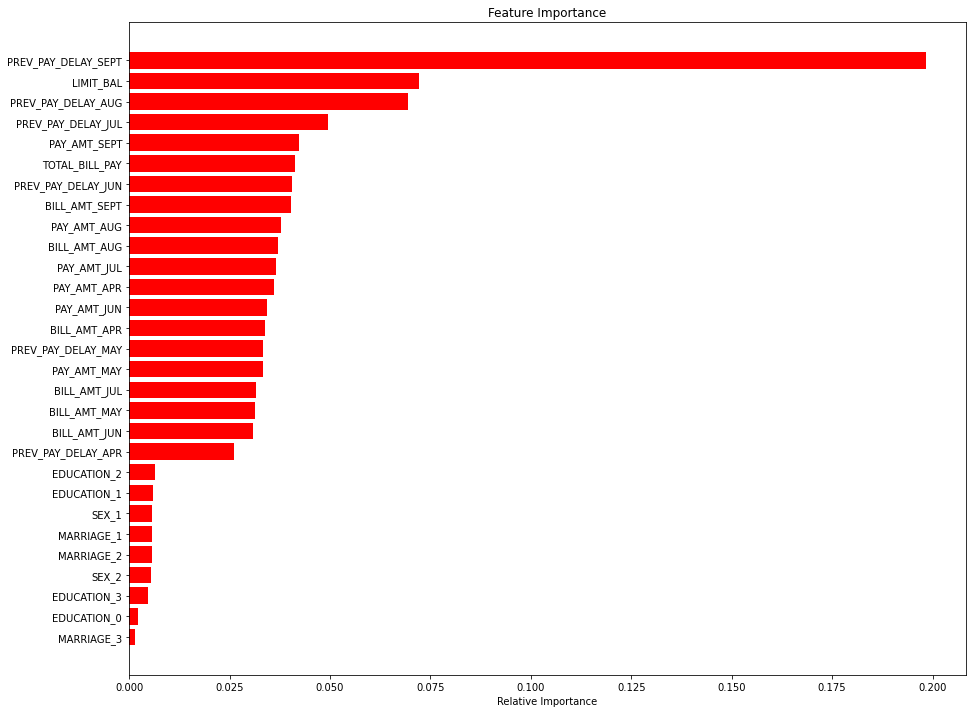

In [98]:
# Plot horizontal bar graph according to the most important features

plt.figure (figsize= (15,12))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Conclusion:
 * We have implemented random forest and we are getting accuracy_score is approx 88%.
 * Precision score approx is 77% and f1_score is 79%
 * roc_auc approx is 86% and recall_score is approx 80% . 
 * From the above horizontal bar graph,we have seen that PAY_SEPT have more than any other column.

# KNN Classifier

* **KNN(K-Nearest Neighbors)** algorithm. It is one of the simplest and widely used classification algorithms in which a new data point is classified based on similarity in the specific group of neighboring data points. This gives a competitive result. 

In [99]:
# Import K-Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn = KNeighborsClassifier() # creating object

In [101]:
# knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [102]:
# Fit the model

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid, scoring = 'accuracy',cv=3)
knn_cv.fit(X_train_sm,Y_train_sm)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20]},
             scoring='accuracy')

In [103]:
# find best score 
knn_cv.best_score_

0.7580341897872408

In [104]:
# best parameters
knn_cv.best_params_

{'n_neighbors': 5}

In [105]:
optimized_knn=knn_cv.best_estimator_
optimized_knn

KNeighborsClassifier()

In [106]:
# model score  on training data
print(f"training_model_score:  {knn_cv.score(X_train_sm,Y_train_sm )}")

training_model_score:  0.8487282920825926


In [107]:
# model score on testing data
print(f"testing_model_score:  {knn_cv.score(X_test,Y_test)}")

testing_model_score:  0.7879402077527236


In [108]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_knn = knn_cv.predict(X_train_sm)
y_test_class_preds_knn = knn_cv.predict(X_test)

In [109]:
y_test_class_preds_knn

array([1, 0, 0, ..., 0, 1, 1])

In [110]:
Y_test

6281     1
10210    0
26384    0
14927    1
7705     0
        ..
14940    0
13816    0
17573    0
12637    1
19502    0
Name: Defaulter_Payment, Length: 3947, dtype: int64

In [111]:
# Evaluation of training model
print_metrics(Y_train_sm,y_train_class_preds_knn)

accuracy_score is 0.8487282920825926
precision_score is 0.7950483021923989
recall_score is 0.939696431013264
f1_score is 0.8613417729451948
roc_auc_score is 0.8487282920825927
confusion_matrix is [[11083  3543]
 [  882 13744]]
classification_report is               precision    recall  f1-score   support

           0       0.93      0.76      0.83     14626
           1       0.80      0.94      0.86     14626

    accuracy                           0.85     29252
   macro avg       0.86      0.85      0.85     29252
weighted avg       0.86      0.85      0.85     29252



[[11083  3543]
 [  882 13744]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

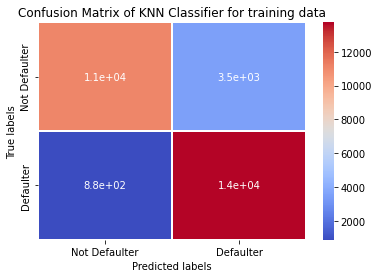

In [112]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_train_sm,y_train_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of KNN Classifier for training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

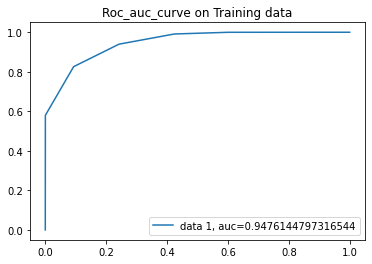

In [113]:
# Roc_auc_curve on taining data

y_train_preds_proba_knn = knn_cv.predict_proba(X_train_sm)[::,1]
fpr, tpr, _ = roc_curve(Y_train_sm,  y_train_preds_proba_knn )
auc = roc_auc_score(Y_train_sm,  y_train_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [114]:
# Inserting metrices for K-Neighbor Classifier in the dataframe 
evaluation_metrices_df.loc[i,"Model_Name"]='K-Neighbor Classifier'

# Evaluation of testing model
print_metrics(Y_test,y_test_class_preds_knn)
i+=1  # i is a incremented variable

accuracy_score is 0.7879402077527236
precision_score is 0.5685011709601874
recall_score is 0.9066293183940243
f1_score is 0.6988125224901044
roc_auc_score is 0.8251853128826865
confusion_matrix is [[2139  737]
 [ 100  971]]
classification_report is               precision    recall  f1-score   support

           0       0.96      0.74      0.84      2876
           1       0.57      0.91      0.70      1071

    accuracy                           0.79      3947
   macro avg       0.76      0.83      0.77      3947
weighted avg       0.85      0.79      0.80      3947



[[2139  737]
 [ 100  971]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

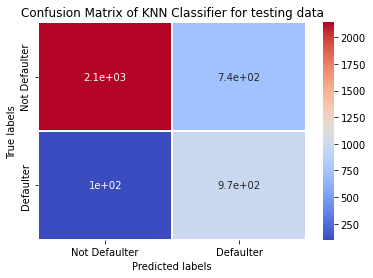

In [115]:
# Get the confusion matrix for testing data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_test,y_test_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of KNN Classifier for testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

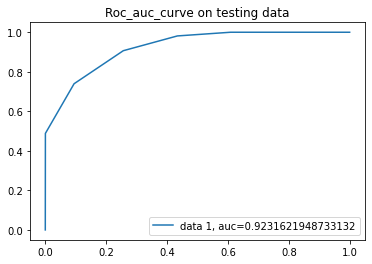

In [116]:
# Roc_auc_curve for testing data
y_test_preds_proba_knn = knn_cv.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_test_preds_proba_knn )
auc = roc_auc_score(Y_test,  y_test_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on testing data")
plt.legend(loc=4)
plt.show()

# Conclusion:
 * We have implemented K-NN Classifier and we are getting accuracy_score is approx 79%.
 * Precision score approx is 57% and f1_score is 70%
 * roc_auc approx is 83% and recall_score is approx 91% . 
 

# Support Vector Classifier

* Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

* The advantages of support vector machines are:
    * Effective in high dimensional spaces.
    * Still effective in cases where number of dimensions is greater than the number of samples.
    * Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

In [117]:
# Import svm from sklearn
from sklearn import svm
 
# Create a svm Classifier
svm_model = svm.SVC(kernel = 'poly', gamma='scale', probability=True) 
 
# Train the model using the training sets
svm_model.fit(X_train_sm, Y_train_sm)

SVC(kernel='poly', probability=True)

In [118]:
svm_model.score(X_train_sm, Y_train_sm)

0.7318815807466156

In [119]:
# Get the y- train & test predicted values
y_train_preds_svm = svm_model.predict(X_train_sm)
y_test_preds_svm = svm_model.predict(X_test)

In [120]:
# get the accuracy score
svm_train_accuracy= accuracy_score(Y_train_sm, y_train_preds_svm)
svm_test_accuracy= accuracy_score(Y_test, y_test_preds_svm)

print("The accuracy on train data is ", svm_train_accuracy)
print("The accuracy on test data is ", svm_test_accuracy)

The accuracy on train data is  0.7318815807466156
The accuracy on test data is  0.7757790727134533


In [121]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_svm = svm_model.predict(X_train_sm)
y_test_class_preds_svm = svm_model.predict(X_test)

In [122]:
y_test_class_preds_svm

array([1, 1, 0, ..., 0, 1, 0])

In [123]:
Y_test

6281     1
10210    0
26384    0
14927    1
7705     0
        ..
14940    0
13816    0
17573    0
12637    1
19502    0
Name: Defaulter_Payment, Length: 3947, dtype: int64

In [124]:
# Evaluation of training model
print_metrics(Y_train_sm,y_train_class_preds_svm)

accuracy_score is 0.7318815807466156
precision_score is 0.7757541263517359
recall_score is 0.6523314645152468
f1_score is 0.7087093779015785
roc_auc_score is 0.7318815807466157
confusion_matrix is [[11868  2758]
 [ 5085  9541]]
classification_report is               precision    recall  f1-score   support

           0       0.70      0.81      0.75     14626
           1       0.78      0.65      0.71     14626

    accuracy                           0.73     29252
   macro avg       0.74      0.73      0.73     29252
weighted avg       0.74      0.73      0.73     29252



[[11868  2758]
 [ 5085  9541]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

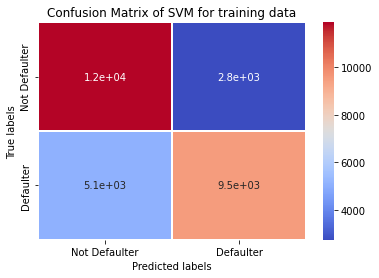

In [125]:
# Get the confusion matrix for  training  data 

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_train_sm,y_train_class_preds_svm)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of SVM for training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

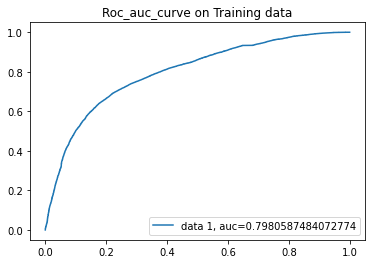

In [126]:
# Roc_auc_curve on taining data

y_train_preds_proba_svm = svm_model.predict_proba(X_train_sm)[::,1]
fpr, tpr, _ = roc_curve(Y_train_sm,  y_train_preds_proba_svm )
auc = roc_auc_score(Y_train_sm,  y_train_preds_proba_svm )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [127]:
# Inserting metrices for Support Vector Machine in the dataframe 
evaluation_metrices_df.loc[i,"Model_Name"]='Support Vector Machine'

# Evaluation of testing model
print_metrics(Y_test,y_test_class_preds_svm)
i+=1  # i is a incremented variable

accuracy_score is 0.7757790727134533
precision_score is 0.572429906542056
recall_score is 0.6862745098039216
f1_score is 0.624203821656051
roc_auc_score is 0.7476921923150344
confusion_matrix is [[2327  549]
 [ 336  735]]
classification_report is               precision    recall  f1-score   support

           0       0.87      0.81      0.84      2876
           1       0.57      0.69      0.62      1071

    accuracy                           0.78      3947
   macro avg       0.72      0.75      0.73      3947
weighted avg       0.79      0.78      0.78      3947



[[2139  737]
 [ 100  971]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

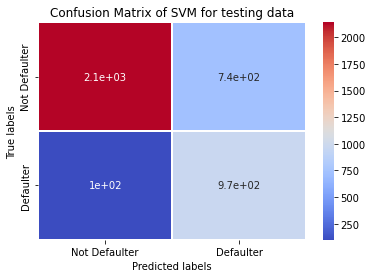

In [128]:
# Get the confusion matrix for testing data 

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_test,y_test_class_preds_knn)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of SVM for testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

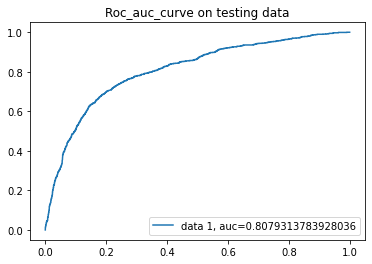

In [129]:
# Roc_auc_curve testing data

y_test_preds_proba_svm = svm_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  y_test_preds_proba_svm )
auc = roc_auc_score(Y_test,  y_test_preds_proba_svm )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on testing data")
plt.legend(loc=4)
plt.show()

# Conclusion:
 * We have implemented Support Vector Classifier and we are getting accuracy_score is approx 78%.
 * Precision score approx is 57% and f1_score is 62%
 * roc_auc approx is 75% and recall_score is approx 69% . 


# XG Boosting

* **XGBoost** or extreme gradient boosting is one of the well-known gradient boosting techniques(ensemble) having enhanced performance and speed in tree-based (sequential decision trees) machine learning algorithms

In [130]:
from xgboost import  XGBClassifier

In [131]:
param_test1 = {
 'max_depth':range(2,3,6),
 'min_child_weight':range(1,2,6)}

In [132]:
# xg boost with grid search cv
xgb_grid = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1 ,objective= 'binary:logistic'), 
 param_grid = param_test1, scoring='roc_auc', cv=3)

In [133]:
xgb_grid.fit(X_train_sm,Y_train_sm)

GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=5),
             param_grid={'max_depth': range(2, 3, 6),
                         'min_child_weight': range(1, 2, 6)},
             scoring='roc_auc')

In [134]:
xgb_grid.best_params_

{'max_depth': 2, 'min_child_weight': 1}

In [135]:
optimized_xgb=xgb_grid.best_estimator_
optimized_xgb

XGBClassifier(max_depth=2)

In [136]:
xgb_grid.best_score_

0.8179713066727649

In [137]:
# model score  on training data
print(f"training_model_score:  {xgb_grid.score(X_train_sm,Y_train_sm )}")

# model score on testing data
print(f"testing_model_score:  {xgb_grid.score(X_test,Y_test)}")

training_model_score:  0.8445411916749616
testing_model_score:  0.7829367027293068


In [138]:
# Get the predicted classes
y_train_class_preds_xgb = xgb_grid.predict(X_train_sm)
y_test_class_preds_xgb = xgb_grid.predict(X_test)

In [139]:
y_test_class_preds_xgb

array([1, 0, 0, ..., 0, 0, 0])

In [140]:
Y_test

6281     1
10210    0
26384    0
14927    1
7705     0
        ..
14940    0
13816    0
17573    0
12637    1
19502    0
Name: Defaulter_Payment, Length: 3947, dtype: int64

In [141]:
# Evaluation of training model
print_metrics(Y_train_sm,y_train_class_preds_xgb)

accuracy_score is 0.7704088609325858
precision_score is 0.8174666880719217
recall_score is 0.6962942704772324
f1_score is 0.752030719243834
roc_auc_score is 0.7704088609325859
confusion_matrix is [[12352  2274]
 [ 4442 10184]]
classification_report is               precision    recall  f1-score   support

           0       0.74      0.84      0.79     14626
           1       0.82      0.70      0.75     14626

    accuracy                           0.77     29252
   macro avg       0.78      0.77      0.77     29252
weighted avg       0.78      0.77      0.77     29252



[[12352  2274]
 [ 4442 10184]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

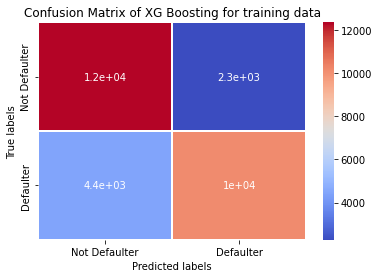

In [142]:
# Get the confusion matrix for  training  data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_train_sm,y_train_class_preds_xgb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of XG Boosting for training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

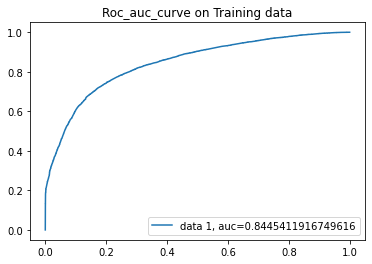

In [143]:
# Roc_auc_curve on training data
y_train_preds_proba_xgb = xgb_grid.predict_proba(X_train_sm)[::,1]
fpr, tpr, _ = roc_curve(Y_train_sm,  y_train_preds_proba_xgb )
auc = roc_auc_score(Y_train_sm,  y_train_preds_proba_xgb )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [144]:
# Inserting metrices for XG Boosting in the dataframe 
evaluation_metrices_df.loc[i,"Model_Name"]='XG Boosting'
# Evaluation of testing model
print_metrics(Y_test,y_test_class_preds_xgb)
i+=1  # i is a incremented variable

accuracy_score is 0.7737522168735749
precision_score is 0.5828677839851024
recall_score is 0.5845004668534081
f1_score is 0.5836829836829837
roc_auc_score is 0.7143642807146039
confusion_matrix is [[2428  448]
 [ 445  626]]
classification_report is               precision    recall  f1-score   support

           0       0.85      0.84      0.84      2876
           1       0.58      0.58      0.58      1071

    accuracy                           0.77      3947
   macro avg       0.71      0.71      0.71      3947
weighted avg       0.77      0.77      0.77      3947



[[2428  448]
 [ 445  626]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

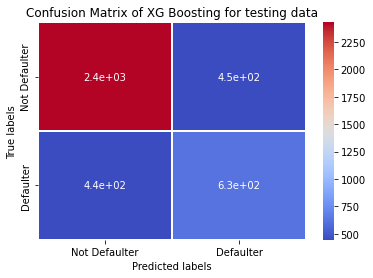

In [145]:
# Get the confusion matrix for  testing data 
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_test,y_test_class_preds_xgb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of XG Boosting for testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

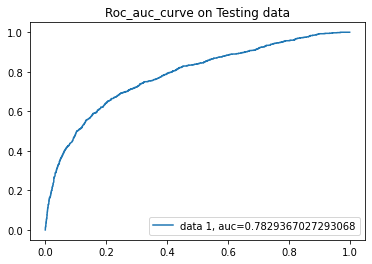

In [146]:
# Roc_auc_curve testing data
y_test_preds_proba_xgb = xgb_grid.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_test_preds_proba_xgb)
auc = roc_auc_score(Y_test,  y_test_preds_proba_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

# Conclusion:
 * We have implemented XG Boosting and we are getting accuracy_score is approx 77%.
 * Precision score approx is 58% and f1_score is 58%
 * roc_auc approx is 71% As we have imbalanced dataset, recall_score is approx 58% better parameter. 


# Decision Tree Classifier

The **decision tree classifier** creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [147]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
parameters = {'max_depth':[1,2,3,4,5,6],'min_samples_split':[3,4,5,6,7],'min_samples_leaf':[1,2,3,4,5,6]}
tree = GridSearchCV(decision_tree, parameters,cv=10)
tree.fit(X_train_sm,Y_train_sm)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6, 7]})

In [148]:
tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [149]:
optimized_tree=tree.best_estimator_
optimized_tree

DecisionTreeClassifier(max_depth=6, min_samples_split=5)

In [150]:
tree.best_score_

0.7249454522086102

In [151]:
# Model score  on training data
print(f"training_model_score:  {tree.score(X_train_sm,Y_train_sm )}")

# Model score on testing data
print(f"testing_model_score:  {tree.score(X_test,Y_test)}")

training_model_score:  0.7403254478326269
testing_model_score:  0.7696985051938181


In [152]:
# To predict the classes either 1 or 0
# Get the predicted classes
Y_train_class_preds_tree = tree.predict(X_train_sm)
Y_test_class_preds_tree = tree.predict(X_test)

In [153]:
# Print classes that are predicted by test data
Y_test_class_preds_tree

array([1, 0, 0, ..., 0, 1, 0])

In [154]:
Y_test

6281     1
10210    0
26384    0
14927    1
7705     0
        ..
14940    0
13816    0
17573    0
12637    1
19502    0
Name: Defaulter_Payment, Length: 3947, dtype: int64

In [155]:
# Evaluation of training model
print_metrics(Y_train_sm,Y_train_class_preds_tree)

accuracy_score is 0.7403254478326269
precision_score is 0.8125555753156678
recall_score is 0.6247777929714208
f1_score is 0.7064007421150278
roc_auc_score is 0.7403254478326269
confusion_matrix is [[12518  2108]
 [ 5488  9138]]
classification_report is               precision    recall  f1-score   support

           0       0.70      0.86      0.77     14626
           1       0.81      0.62      0.71     14626

    accuracy                           0.74     29252
   macro avg       0.75      0.74      0.74     29252
weighted avg       0.75      0.74      0.74     29252



[[12518  2108]
 [ 5488  9138]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

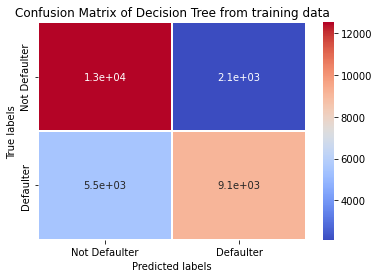

In [156]:
# Get the confusion matrix for training data 

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_train_sm,Y_train_class_preds_tree)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Decision Tree from training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

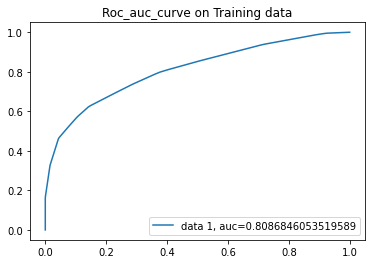

In [157]:
# Roc_auc_curve from training data

y_train_preds_proba_tree = tree.predict_proba(X_train_sm)[::,1]
fpr, tpr, _ = roc_curve(Y_train_sm,  y_train_preds_proba_tree )
auc = roc_auc_score(Y_train_sm,  y_train_preds_proba_tree  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [158]:
# Inserting metrices for Random Forest in the dataframe 
evaluation_metrices_df.loc[i,"Model_Name"]='Decision Tree Classifier'

# Evaluation of testing model
print_metrics(Y_test,Y_test_class_preds_tree)
i+=1  # i is a incremented variable

accuracy_score is 0.7696985051938181
precision_score is 0.5829918032786885
recall_score is 0.5312791783380019
f1_score is 0.5559355153883732
roc_auc_score is 0.694881591950642
confusion_matrix is [[2469  407]
 [ 502  569]]
classification_report is               precision    recall  f1-score   support

           0       0.83      0.86      0.84      2876
           1       0.58      0.53      0.56      1071

    accuracy                           0.77      3947
   macro avg       0.71      0.69      0.70      3947
weighted avg       0.76      0.77      0.77      3947



[[2469  407]
 [ 502  569]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

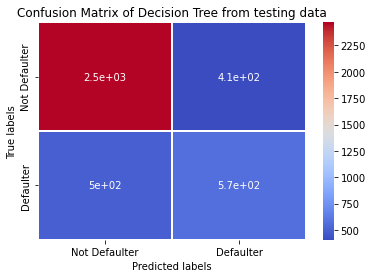

In [159]:
# Get the confusion matrix for testing  data 

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(Y_test,Y_test_class_preds_tree)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Decision Tree from testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

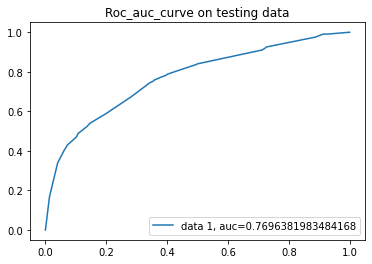

In [160]:
# Roc_auc_curve from testing data

y_test_preds_proba_tree = tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  y_test_preds_proba_tree)
auc = roc_auc_score(Y_test,  y_test_preds_proba_tree)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on testing data")
plt.legend(loc=4)
plt.show()

# Conclusion:
 * We have implemented Decision Tree Classifier and we are getting accuracy_score is approx 77%.
 * Precision score approx is 58.29% and f1_score is 56%
 * roc_auc approx is 69% As we have imbalanced dataset, recall_score is approx 53% better parameter. 


In [161]:
# dataframe for comparing different algorithms
evaluation_metrices_df.set_index('Model_Name')

,Accuracy_Score,Precision_Score,Recall_Score,F1_Score,RUC_AUC_Score
Model_Name,,,,,
Logistics regression,0.6850772738788954,0.4464508094645081,0.6694677871148459,0.5356742622338438,0.6801789561443493
Random Forest,0.8821890043070687,0.772972972972973,0.8011204481792717,0.7867950481430538,0.8567493756890795
K-Neighbor Classifier,0.7879402077527236,0.5685011709601874,0.9066293183940243,0.6988125224901044,0.8251853128826865
Support Vector Machine,0.7757790727134533,0.572429906542056,0.6862745098039216,0.624203821656051,0.7476921923150344
XG Boosting,0.7737522168735749,0.5828677839851024,0.5845004668534081,0.5836829836829837,0.7143642807146039
Decision Tree Classifier,0.7696985051938181,0.5829918032786885,0.5312791783380019,0.5559355153883732,0.694881591950642


# Final Conclusions:

* There is neither null nor duplicate values in our dataset.

* We rename the column for better understanding.

* We check the distribution of defaulter vs non defaulter and we see  that around 78% are non defaulter and 22% are defaulter.
* We have found the proportion of defaulters with respect to Marriage, Education, Sex feature and we found that :
  * Most of the defaulters are Female
  * Most of the defaulters are from university 
  * Marital status is Single 

* We have use the boxplot to detect the outliers and we see that there are so many outliers in the data so we apply IQR(Inter Quartile Range) which is one of the technique to remove outliers.
    
* We plot heat map to see the correlation between varaiablesgives the graphical representation between all the variables and we see that age and marriage are highly negatively correlated to each other.

* After that we build the six models Logistic Regression, Random Forest, XG Boosting, Support Vector Classifier, K-Neighbor Classifier, Decision Tree Classifier and we obtained the best accuracy  from Random Forest Classifier.

* Using a **Logistic Regression classifier**, we can predict an accuracy of 69% .
* Using **Random Forest Classifier**, we can predict an accuracy of 88.21% .
* Using **K-Neighbor Classifier**, we can predict an accuracy of 79% .
* Using **Support Vector Machine Classifier**, we can predict an accuracy of 78% .
* Using **XG Boosting**, we can predict an accuracy of 77.37%.
* Using **Decision Tree Classifier** , we can predict an accuracy of 77%.
* **Random Forest Classifier** performs best among all models.
* **Logistic Regression** are not giving good precision score.
* Top 3 models are **Random Forest , K-Neighbor Classifier and Support Vector Classifier** that gives best Precision, Recall ,ROC_AUC and F1 score. 


